In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [253]:
df = pd.read_csv("/home/mete/Classified Data.csv",index_col=0)

In [254]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [255]:
# number of dependent feature unique values
df["TARGET CLASS"].unique()

array([1, 0])

In [268]:
# checking dataset balance
df["TARGET CLASS"].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [257]:
# features seperation
X = df.drop("TARGET CLASS", axis=1)
y = df["TARGET CLASS"]

In [258]:
# train-test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [262]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
scaled_X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X.columns)
scaled_X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X.columns)

In [284]:
# modeling, elbow method
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

err_rate = []
for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    preds = model.predict(scaled_X_test)
    err_rate.append(1-accuracy_score(preds, y_test))

Text(0, 0.5, 'error rate')

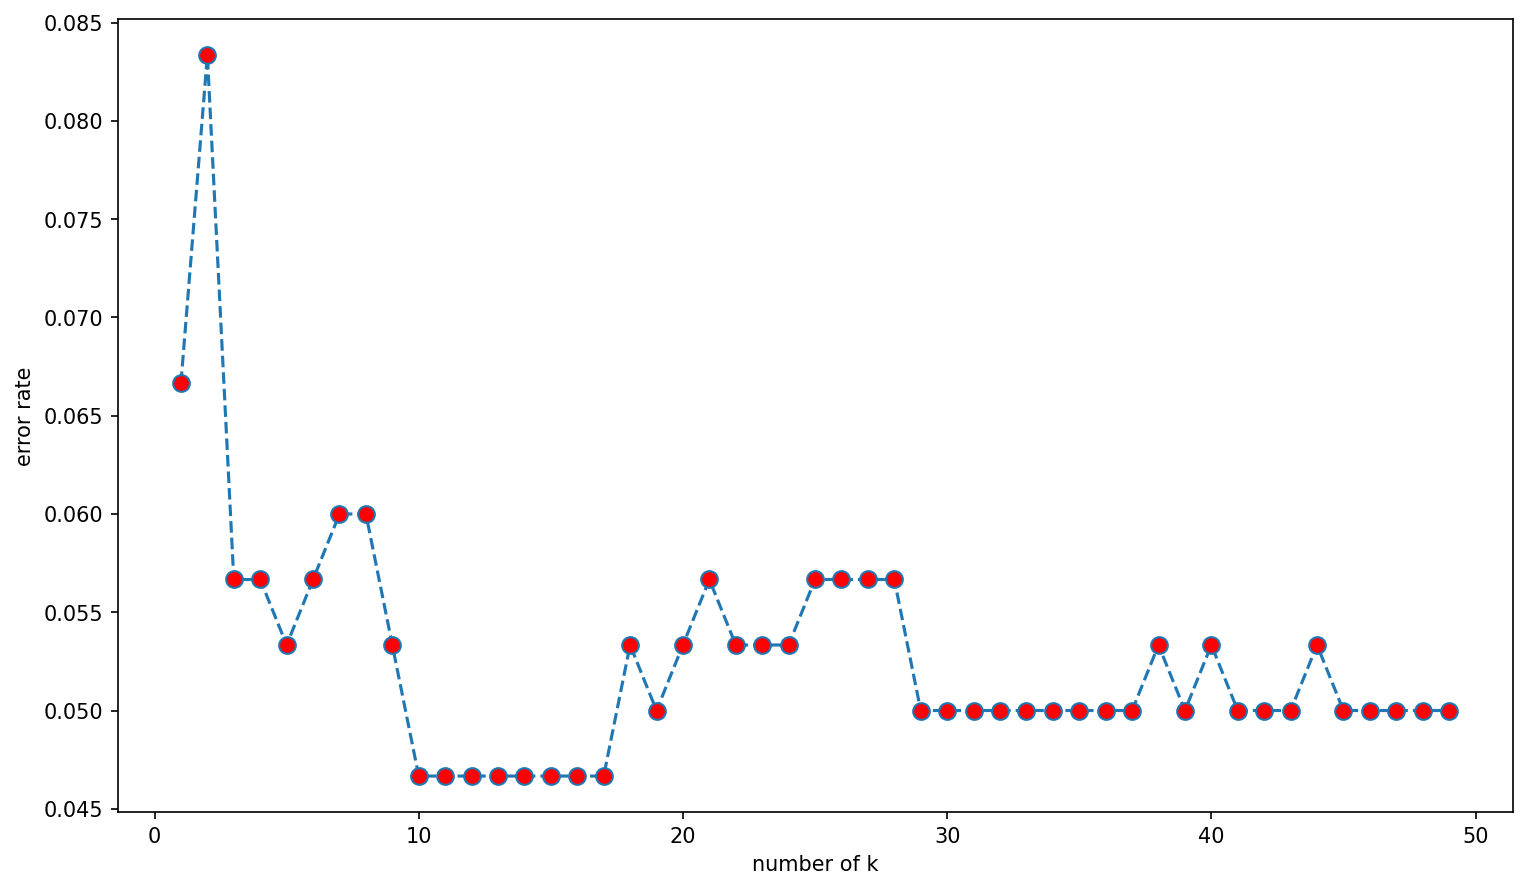

In [281]:
plt.figure(figsize=(12,7), dpi=150)
plt.plot(range(1,50), err_rate, linestyle="dashed", marker="o", ms=8, markerfacecolor="red");
plt.xlabel("number of k")
plt.ylabel("error rate")

In [282]:
final_model = KNeighborsClassifier(n_neighbors=10)

In [285]:
final_model.fit(scaled_X_train, y_train)
preds = final_model.predict(scaled_X_test)

In [286]:
accuracy_score(y_test, preds)

0.9533333333333334

In [287]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       142
           1       0.97      0.94      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

